In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
# from sklearn.metrics import root_mean_squared_error

In [5]:
pd.__version__

'1.4.2'

In [6]:
# df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [7]:
!pip install pyarrow

In [8]:
len(df1.columns)
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
len(df2.columns)

19

In [10]:
df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']
df1['duration'] = df1.duration.apply(lambda td: td.total_seconds() / 60)
df1['duration'].std()

42.594351241920904

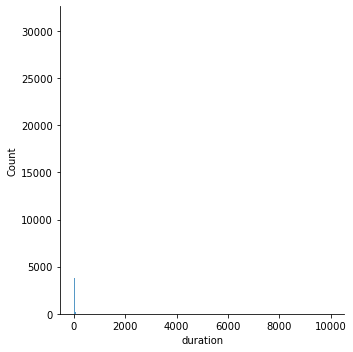

In [9]:
sns.displot(df1.duration)

In [10]:
df1.duration.describe(percentiles=[0.90, 0.95, 0.98, 0.99]).round(2)

count    3066766.00
mean          15.67
std           42.59
min          -29.20
50%           11.52
90%           27.94
95%           36.47
98%           48.73
99%           57.25
max        10029.18
Name: duration, dtype: float64

In [10]:
# Remove outliers by filtering the DataFrame
filtered_df = df1[(df1.duration >= 1) & (df1.duration <= 60)]

In [11]:
len(df1)

3066766

In [12]:
len(filtered_df)

3009173

In [13]:
fraction_left = (len(filtered_df) / len(df1)) * 100
fraction_left

98.1220282212598

In [11]:
df1 = df1[(df1.duration >= 1) & (df1.duration <= 60)].copy()

In [12]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [13]:
df1[categorical] = df1[categorical].astype(str)

In [14]:
df1.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [14]:
train_dicts = df1[categorical].to_dict(orient = 'records')

In [15]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [16]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [55]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [18]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [19]:
# Get the dimensionality of the feature matrix
num_columns = X_train.shape[1]
print(f"Dimensionality of the feature matrix (number of columns): {num_columns}")

Dimensionality of the feature matrix (number of columns): 515


In [17]:
target = 'duration'
y_train = df1[target].values

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

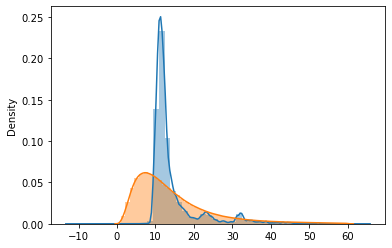

In [23]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

In [20]:
# Calculate RMSE
rmse = mean_squared_error(y_train, y_pred, squared=False)

print(f"RMSE on train: {rmse:.2f}")

RMSE on train: 7.65


In [45]:
# Print the version of Scikit-learn
print(sklearn.__version__)

1.0.2


In [21]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [ ]:
df_val = read_data('data/yellow_tripdata_2023-02.parquet')

In [1]:
val_dicts = df_val[categorical].to_dict(orient='records')

NameError: name 'df_val' is not defined

In [ ]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values